# Panagiotis Karamitopoulos
# Assignment 6 - Data Engineering


# Install ydata-profiling

In [1]:
!pip install ydata-profiling



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.7 MB/s eta 0:00:00


In [2]:
!pip install umap-learn

# Import Libraries

In [3]:
import pandas as pd
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
import umap


# Question 1

# 1.1 Load Dataset


In [4]:
df = pd.read_csv('bankloan.csv')


#1.2.1 Profiling Report

In [5]:
profile = ProfileReport(df, title="Profiling Report")
#profile

# 1.2.2 Save as HTML File

In [ ]:
profile.to_file("report.html")

Το dataset περιέχει 212999 παρατηρήσεις με 53 χαρακτηριστικά, εκ των οποίων 33 είναι αριθμητικά χαρακτηριστικά, 17 κατηγορικά, 2 τύπου κειμένου (text) και 1 unsupported. Υπάρχουν 1566652 ελλειπείς τιμές χαρακτηριστικών, αριθμός που αντιστοιχεί στο 13.9% των δεδομένων. Αξίζει να σημειωθεί ότι δεν υπάρχουν καθόλου διπλοεγγραφές.


# 1.3 Description of Features


In [7]:
df.describe()

,Row ID,id,member_id,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,...,mths_since_last_major_derog,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,Unnamed: 50,36months,60months
count,368.000000,2.129990e+05,2.129990e+05,212999.000000,212999.000000,212999.000000,212999.000000,2.129990e+05,212999.000000,212999.000000,...,62365.000000,441.000000,439.000000,212999.000000,212999.000000,2.129990e+05,2.129990e+05,0.0,511.000000,511.000000
mean,184.500000,6.103515e+07,6.515927e+07,15257.965530,15257.965530,12.401658,440.842921,7.780071e+04,19.360817,0.347462,...,45.468356,107574.096327,18.320114,0.005718,261.951652,1.416537e+05,3.444425e+04,NaN,0.622309,0.377691
std,106.376689,4.734904e+06,5.215173e+06,8611.713377,8611.713377,4.249365,245.858646,8.188065e+04,31.925871,0.921209,...,22.645675,47921.057382,7.230012,0.081045,2215.188372,1.568766e+05,3.531827e+04,NaN,0.485285,0.485285
min,1.000000,5.670500e+04,7.082500e+04,1000.000000,1000.000000,5.320000,30.120000,0.000000e+00,0.000000,0.000000,...,0.000000,17950.000000,3.050000,0.000000,0.000000,0.000000e+00,0.000000e+00,NaN,0.000000,0.000000
25%,92.750000,5.783411e+07,6.158651e+07,8500.000000,8500.000000,9.170000,262.230000,4.700000e+04,12.660000,0.000000,...,28.000000,75001.000000,13.185000,0.000000,0.000000,3.143300e+04,1.460000e+04,NaN,0.000000,0.000000
50%,184.500000,6.137900e+07,6.549753e+07,14000.000000,14000.000000,12.290000,382.870000,6.500000e+04,18.720000,0.000000,...,45.000000,100000.000000,17.750000,0.000000,0.000000,8.138600e+04,2.510000e+04,NaN,1.000000,0.000000
75%,276.250000,6.503778e+07,6.956436e+07,20000.000000,20000.000000,14.650000,578.790000,9.250000e+04,25.520000,0.000000,...,63.000000,131000.000000,22.650000,0.000000,0.000000,2.097080e+05,4.260000e+04,NaN,1.000000,1.000000
max,368.000000,6.861687e+07,7.351969e+07,35000.000000,35000.000000,28.990000,1445.460000,9.000000e+06,9999.000000,30.000000,...,171.000000,410000.000000,43.860000,5.000000,380757.000000,4.127799e+06,1.641300e+06,NaN,1.000000,1.000000


In [8]:
df.describe(include="object")


,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,212999,212999,212999,200209,200232,212999,212999,212999,212999,212999,212984,212999,212999,204510,210226,212992,212999
unique,2,7,35,69666,11,4,3,12,2,13,14,650,2,12,3,13,2
top,36 months,B,C1,Teacher,10+ years,MORTGAGE,Source Verified,15-Oct,Current,debt_consolidation,Debt consolidation,2-Aug,w,16-Jan,16-Feb,16-Jan,INDIVIDUAL
freq,143033,62657,13579,4149,71879,105999,88235,47208,210226,122831,122825,1598,149678,157305,185207,210920,212558


# Question 2

#2.1 Mean, min, max loan_amnt

In [9]:
print(f"Mean: {df['loan_amnt'].mean()}")
print(f"Min: {df['loan_amnt'].min()}")
print(f"Max: {df['loan_amnt'].max()}")



Mean: 15257.965530354602
Min: 1000
Max: 35000


Σύμφωνα με τις παραπάνω γραμμές του κώδικα, αλλά και με το features description και το profiling report η μέση τιμή που αιτούνται οι υποψήφιοι στο σύνολο δεδομένων (loan_amnt) είναι 15257.96, η ελάχιστη 1000 και η μέγιστη 35000.

# 2.2 Remove Features

Σύμφωνα με τα Alerts του Profiling Report τα ποσοστά ελλειπών τιμών ανά χαρακτηριστικό είναι τα εξής:

*   Row ID has 212631 (99.8%) missing values
*   emp_title has 12790 (6.0%) missing values
*   emp_length has 12767 (6.0%) missing values
*   mths_since_last_delinq has 103371 (48.5%) missing values
*   last_pymnt_d has 8489 (4.0%) missing values
*   next_pymnt_d has 2773 (1.3%) missing values
*   mths_since_last_major_derog has 150634 (70.7%) missing values
*   annual_inc_joint has 212558 (99.8%) missing values
*   dti_joint has 212560 (99.8%) missing values
*   Unnamed: 50 has 212999 (100.0%) missing values
*   36months has 212488 (99.8%) missing values
*   60months has 212488 (99.8%) missing values

Επομένως τα χαρακτηριστικά: Row ID, annual_inc_joint, dti_joint, Unnamed: 50, 36months, 60months, mths_since_last_major_derog, mths_since_last_delinq πρέπει να αφαιρεθούν καθώς σε αυτά υπάρχει αρκετά μέγαλο ποσοστό missing values (~50%-100%). Αξίζει να σημειωθεί ότι το χαρακτηριστικό Row ID θα αφαιρούνταν ακόμη και αν δεν είχε μεγάλο ποσοστό mising values, καθώς το ID είναι ένα αναγνωριστικό και δεν περιέχει πληροφορία που να συμβάλει στη μάθηση. Για τον ίδιο λόγο αφαιρούνται και το  id και  member_id.

Επιπλέον, θα πρέπει να αφαιρεθούν τα χαρακτηριστικά που είναι τύπου text, καθώς αυτά δεν συμβάλλουν στη μάθηση. Αυτά τα χαρακτηριστικά είναι τα εξής: emp_title, earliest_cr_line. Επίσης θα αφαιρεθεί και το χαρακτηριστικό title, το οποίο εξηγεί τον σκοπό του δανείου, καθώς υπάρχει και το χαρακτηριστικό  purpose για αυτόν τον λόγο, οπότε το title είναι περιττό.  

Τέλος, θα πρέπει να αφαιρεθούν χαρακτηριστικά που παρέχουν πληροφορίες που είναι διαθέσιμες μετά την έκδοση δανείου, τα οποία είναι τα εξής:

*   funded_amnt: το ποσό που εγκρίθηκε από την τράπεζα καθορίζεται μετά την έγκριση του δανείου, επομένως προδίδει την απόφαση.
*   out_prncp: το υπόλοιπο του κεφαλαίου που δεν έχει ήδη πληρωθεί.
*   total_pymnt: το ποσό που έχει εξοφληθεί από τον πελάτη μέχρι σήμερα.
*   total_rec_prncp: το συνολικό κεφάλαιο που έχει πληρωθεί.
*   total_rec_int: οι τόκοι που έχουν πληρωθεί από τον πελάτη μέχρι σήμερα.
*   total_rec_late_fee: καθυστερημένα τέλη που έχουν εισπραχθεί μέχρι σήμερα.
*   recoveries: διαδικασίες ανάκτησης που έχουν κινηθεί κατά του δανειολήπτη.
*   collection_recovery_fee: τα τέλη που εισπράχθηκαν κατά τη διάρκεια των διαδικασιών ανάκτησης.
*   last_credit_pull_d: ο πιο πρόσφατος μήνας που επιβλήθηκε πίστωση για το δάνειο.
*   installment: Η μηνιαία πληρωμή που οφείλει ο δανειολήπτης σε περίπτωση χορήγησης του δανείου.
*   loan_status: η τρέχουσα κατάσταση του δανείου.
*   int_rate: το επιτόκιο του δανείου.
*   last_pymnt_d: Ο τελευταίος μήνας κατά τον οποίο ελήφθη η πληρωμή.
*   last_pymnt_amnt: Το τελευταίο ποσό πληρωμής που ελήφθη.
*   next_pymnt_d: Επόμενη προγραμματισμένη ημερομηνία πληρωμής.


In [10]:
drop_cols = ['Row ID', 'annual_inc_joint', 'dti_joint', 'Unnamed: 50', '36months', '60months', 'mths_since_last_major_derog', 'mths_since_last_delinq', 'id', 'member_id', 'emp_title', 'earliest_cr_line', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
'funded_amnt', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_credit_pull_d', 'installment', 'loan_status',  'int_rate', 'title']
df = df.drop(columns=drop_cols)

In [11]:
#df.dtypes
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64','float64']).columns.tolist()

categorical_features, numerical_features

(['term',
  'grade',
  'sub_grade',
  'emp_length',
  'home_ownership',
  'verification_status',
  'issue_d',
  'purpose',
  'initial_list_status',
  'application_type'],
 ['loan_amnt',
  'annual_inc',
  'dti',
  'delinq_2yrs',
  'inq_last_6mths',
  'open_acc',
  'pub_rec',
  'revol_bal',
  'revol_util',
  'total_acc',
  'collections_12_mths_ex_med',
  'acc_now_delinq',
  'tot_coll_amt',
  'tot_cur_bal',
  'total_rev_hi_lim'])

Μετά την αφαίρεση έχουν μείνει 10 κατηγορικά και 15 αριθμητικά χαρακτηριστικά.

#2.3 Preprocessing


#2.3.1 Numerical Ιmputation with Μedian


In [12]:
for feature in numerical_features:
  df[feature] = df[feature].fillna(df[feature].median())

#2.3.2 Categorical Ιmputation with Mode

In [13]:
for feature in categorical_features:
  df[feature] = df[feature].fillna(df[feature].mode().iloc[0])

#2.3.3 Transform emp_length to Numeric Values (0-10)

In [14]:
df['emp_length'] = df['emp_length'].replace({
    '10+ years': 10,
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9
}).astype(int)


Κατά την προεπεξεργασία των δεδομένων οι ελλιπείς τιμές των υπόλοιπων αριθμητικών χαρακτηριστικών συμπληρώθηκαν με τη διάμεσο γιατί είναι πιο ανθεκτική στις ακραίες τιμές, ενώ οι ελλιπείς τιμές των υπόλοιπων κατηγορικών χαρακτηριστικών συμπληρώθηκαν με τη πιο συχνή τιμή, ώστε να διατηρηθεί η κατανομή των κατηγοριών. Τέλος, το χαρακτηριστικό emp_length μετατράπηκε από κατηγορικό σε αριθμητικό ώστε να είναι κατάλληλο για αλγοριθμούς μάθησης.


#2.4 Create Target Variable


In [15]:
target_sub_grades = ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2']
df['target'] = df['sub_grade'].apply(lambda x: 1 if x in target_sub_grades else 0)
df['target'].value_counts(normalize=True) * 100

,proportion
target,
0,71.225217
1,28.774783


Αν η τράπεζα αποφασίσει να χορηγήσει δάνεια μόνο  στους Α, Β1 και Β2, τότε το 71.22% των αιτήσεων θα αποριφθεί και θα εγκριθεί μόνο το 28.77%. Συνεπώς, η κατανομή της μεταβλητής target δεν είναι ισορροπημένη. Η ανισορροπία αυτή θα πρέπει να ληφθεί σοβαρά υπόψη στην αξιολόγηση του ταξινομητή.


#2.5 Loan Amount Acceptance Range

In [16]:
n = 8
loan_min = df['loan_amnt'].min()
loan_max = df['loan_amnt'].max()
bins = np.linspace(loan_min, loan_max, n + 1)
df['loan_amnt_bin'] = pd.cut(df['loan_amnt'], bins=bins, include_lowest=True)
bin_proc = df.groupby('loan_amnt_bin', observed=False)['target'].mean() * 100
results = bin_proc[bin_proc >= 15]
results

,target
loan_amnt_bin,
"(999.999, 5250.0]",24.740563
"(5250.0, 9500.0]",34.696965
"(9500.0, 13750.0]",31.096552
"(13750.0, 18000.0]",29.298526
"(18000.0, 22250.0]",27.036277
"(22250.0, 26500.0]",30.239033
"(26500.0, 30750.0]",28.054441


In [17]:
df = df.drop(columns=['loan_amnt_bin'])

Για τιμές του loan_amnt στα εύρη (999.999, 5250.0], (5250.0, 9500.0], (9500.0, 13750.0], (13750.0, 18000.0], (18000.0, 22250.0], (22250.0, 26500.0], (26500.0, 30750.0] η πιθανότητα έγκρισης δανείων είναι μεγαλύτερη του 15%. Το μόνο εύρος για το οποίο δεν εγκρίνεται δάνειο με πιθανότητα τουλάχιστον 15% είναι το (30750.0, 35000.0]. To εύρος με τη μεγαλύτερη πιθανότητα έγκρισης είναι (5250.0, 9500.0] στο οποίο καταγράφεται πιθανότητα ίση με 34.7%

#Question 3

#3.1.1 StandardScaling Normalization in Numerical Features

In [18]:
numerical_features = df.select_dtypes(include=['int64','float64']).drop(columns=['target'], errors='ignore').columns.tolist()
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

#3.1.2 Encode Categorical Features

In [19]:
df = df.drop(columns=['grade', 'sub_grade'])
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
for categorical_feature in categorical_features:
    df[categorical_feature] = LabelEncoder().fit_transform(df[categorical_feature])



Για το ερώτημα 3 επιλέχθηκε να χρησιμοποιηθεί ο ταξινομητής Decision Tree, ο οποίος δεν επηρεάζεται από την κλίμακα των χαρακτηριστικών, καθώς τα δεντρικά μοντέλα βασίζονται σε κανόνες διαχωρισμού και όχι σε μετρικές αποστάσεων. Ωστόσο, η κανονικοποίηση επιταχύνει την εκπαίδευση τους, καθώς διακριτοποιήσουν γρηγορότερα τα χαρακτηριστικά. Συνεπώς, στα πλαίσια της άσκησης για την κανονικοποίηση των αριθμητικών χαρακτηριστικών επιλέχθηκε η μέθοδος Standard Scaling, η οποία μετατρέπει όλα τα χαρακτηριστικά σε τέτοια μορφή ώστε να έχουν μέση τιμή 0 και τυπική απόκλιση 1. Η μέθοδος αυτή επιλέχθηκε γιατί βελτιώνει τα αποτελέσματα της ταξινόμησης όταν χρησιμοποιούνται άλλοι ταξινομητές που βασίζονται σε αποστάσεις (πχ. ΚΝΝ).

 Επιπλέον, επισημαίνεται ότι οι μεταβλητές grade και subgrade αφαιρούνται γιατί ο στόχος έχει ορισθεί στο ερώτημα 2.4 και οι χρήση τους ως χαρακτηριστικά θα οδηγήσει σε διαρροή πληροφορίας. Για τις υπόλοιπες κατηγορικές τιμές εφαρμόστηκε label encoding ώστε να μετατραπούν σε αριθμητικές τιμές, καθώς οι ταξινομητές Decision Tree και Random Forest δεν επηρεάζονται από την κωδικοποίηση των χαρακτηριστικών.


#3.2 Split Dataset to Train-Test

In [20]:
x = df.drop(columns=['target'])
y = df['target']

x.shape, y.shape

((212999, 23), (212999,))

In [21]:
seed = 42
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed, stratify=y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((149099, 23), (149099,), (63900, 23), (63900,))

#3.3

Στα πλαίσια της άσκησης αρχικά επιλέχθηκε να χρησιμοποιηθεί ο Decision Tree Classifier για τους εξής λόγους:
1. Ερμηνευσιμότητα. Η αποφάσεις στις τράπεζες χρειάζονται μοντέλα τα οποία ερμηνεύονται εύκολα.
2. Διαχείριση μη γραμμικών σχέσεων μεταξύ των χαρακτηριστικών. Τα τραπεζικά δεδομένα είναι μη γραμμικά, υπάρχουν πολλές κατηγορικές και αριθμητικές τιμές.
3. Δεν επηρεάζονται από ακραίες τιμές και δεν χρειάζονται κανονικοποίηση.
4. Μπορούν να διαχειριστούν εύκολα κατηγορικές τιμές.


Για τη βελτιστοποίηση του μοντέλου εφαρμόστηκε 10-fold cross-validation στο σύνολο εκπαίδευσης χρησιμοποιώντας ως παράμετρο τη μεταβλητή max_depth του δέντρου απόφασης. H παράμετρος αυτή είναι η πιο ευαίσθητη παράμετρος ως προς την ικανότητα γενίκευσης, καθώς ελέγχει πόσο βαθύ θα είναι το δέντρο. Η βελτιστοποίηση έγινε με βάση το precision (αιτιολόγηση precision -> βλ. απάντηση επόμενης ερώτησης).

#3.3.1 Grid Search for Decision Tree Hyperparameters

In [22]:
params_grid = {'max_depth': [None, 3, 5, 7, 9, 11]}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=seed), param_grid=params_grid, cv=10, scoring="precision", n_jobs=-1)


# 3.3.2 Train Model on Training Set


In [23]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1, param_grid={'max_depth': [None, 3, 5, 7, 9, 11]},
             scoring='precision')

#3.3.3 Select the Best Parameter

In [24]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation precision:", grid_search.best_score_)
best_model = grid_search.best_estimator_

Best parameters: {'max_depth': 9}
Best cross-validation precision: 0.6820399626490221


#3.4 Evaluate the Best Model on Test Set

In [25]:
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy}')
print(f'F1: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy: 0.7983098591549296
F1: 0.738964678792889
Precision: 0.7583239841421392
Recall: 0.7268922180759831


FN: Η τράπεζα προβλέπει ότι ο πελάτης είναι κακός και δεν δίνει το δάνειο, ενώ είναι καλός. Η τράπεζα δεν διατρέχει κάποιον οικονομικό κίνδυνο, αλλά χάνει έναν καλό πελάτη.
FP: Η τράπεζα προβλέπει ότι ο πελάτης είναι καλος και του δίνει το δάνειο, ενώ είναι κακός. Η τράπεζα διατρέχει κίνδυνο οικονομικής ζημίας.
Συνεπώς, πιο κρίσιμη μετρική για την εφαρμογή είναι το Precision. Το F1 έχει λιγότερο σημασία γιατί δίνει ίδια βαρύτητα σε Precision και Recall, ενώ το Accuracy δεν είναι σημαντικό λόγω της ανισορροπίας των κλάσεων.

#Question 4

# 4.1.1 Create a Random Forest Model

In [26]:
model = RandomForestClassifier(random_state=seed, class_weight='balanced', n_jobs=-1)

Χρησιμοποιήθηκε η παράμετρος class_weight='balanced', ώστε να αντιμετωπιστεί η ανισορροπία κλάσεων του προβλήματος.

# 4.1.2 Train Model on Training Set


In [27]:
model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

#4.1.3 Feature Importance

In [28]:
feature_importance = model.feature_importances_
top_15 = feature_importance.argsort()[::-1][:15]
top15_features = x_train.columns[top_15]
print(top15_features)

Index(['term', 'total_rev_hi_lim', 'revol_util', 'dti', 'annual_inc',
       'loan_amnt', 'revol_bal', 'tot_cur_bal', 'verification_status',
       'total_acc', 'open_acc', 'purpose', 'inq_last_6mths', 'emp_length',
       'issue_d'],
      dtype='object')


#4.2 Correlation Matrix

                         term  total_rev_hi_lim  revol_util       dti  \
term                 1.000000          0.066497    0.095042  0.031811   
total_rev_hi_lim     0.066497          1.000000   -0.108985  0.022138   
revol_util           0.095042         -0.108985    1.000000  0.049648   
dti                  0.031811          0.022138    0.049648  1.000000   
annual_inc           0.038348          0.260857    0.040534 -0.047313   
loan_amnt            0.401795          0.359058    0.127082  0.005895   
revol_bal            0.085982          0.846547    0.239230  0.036919   
tot_cur_bal          0.095631          0.438093    0.097658 -0.002933   
verification_status -0.038056         -0.069671    0.163713  0.020629   
total_acc            0.103391          0.310626   -0.132440  0.060480   
open_acc             0.092644          0.392131   -0.160397  0.076897   
purpose             -0.065981         -0.070745   -0.095136 -0.014918   
inq_last_6mths      -0.000961          0.016305   -

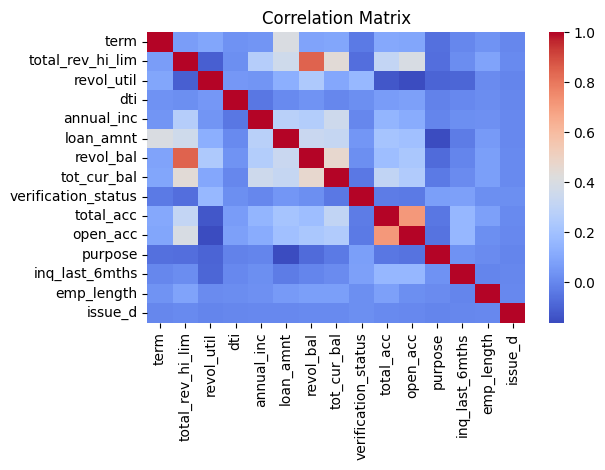

In [29]:
correlation_matrix = df[top15_features].corr()
print(correlation_matrix)
plt.figure()
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

Από τον παραπάνω πίνακα συσχέτισης προκύπτει ότι οι περισσότερες μεταβλητές παρουσιάζουν μικρή ως μέτρια συσχέτιση μεταξύ τους, γεγονός το οποίο σημαίνει ότι τα περισσότερα χαρακτηριστικά παρέχουν διαφορετική πληροφορία στο μοντέλο χωρίς να επικαλύπτει το ένα το άλλο.
Οι 2 περιπτώσεις όπου υπάρχει έντονη επικάλυψη (0.846547 και 0.712439 αντίστοιχα) είναι οι εξής: revol_val - total_rev_hi_lim και open_acc - total_acc. Το γεγονός αυτό σημαίνει ότι ένα χαρακτηριστικό από κάθε ζεύγος θα πρέπει να απομακρυνθεί γιατί παρέχει παρόμοια πληροφορία στο μοντέλο.

#4.3.1 Remove Highly Correlated Feature



In [30]:
x_train = x_train.drop(columns=['revol_bal', 'open_acc'])
x_test  = x_test.drop(columns=['revol_bal', 'open_acc'])

#4.3.2 Create a new Random Forest Model

In [31]:
new_model = RandomForestClassifier(random_state=seed, class_weight='balanced', n_jobs=-1)

#4.3.3 Train Model on Training Set

In [32]:
new_model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

#4.3.4 Evaluate the Model on Test Set

In [33]:
y_pred = new_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy}')
print(f'F1: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy: 0.8171830985915493
F1: 0.7571536610881417
Precision: 0.7905967012108501
Recall: 0.7393632317474089


Παρατηρείται ότι το Precision του μοντέλου Random Forest (μετά την απομάκρυνση των δύο χαρακτηριστικών) έχει αυξηθεί σε 0.79 σε σχέση με το Precision του μοντέλου Decision Tree που ήταν 0.758.

#Question 5

#5.1.1 Load Dataset

In [34]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

#5.1.2 Convert Images (Arrays) to Vectors

In [35]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

#5.2 StandardScaling Normalization

In [36]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


#5.3.1 Principal Component Analysis (PCA)

In [37]:
n_components = 300
pca = PCA(n_components=n_components)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
x_train_pca.shape, x_test_pca.shape


((60000, 300), (10000, 300))

Αν εφαρμοζόταν fit_transform στα x_train και x_test ξεχωριστά, θα υπολογιζόταν διαφορετικές συνιστώσες για κάθε σύνολο, γεγονός που θα μετασχήματιζε τα δύο σύνολα σε διαφορετικούς χώρους χαρακτηριστικών. Το γεγονός αυτό θα οδηγούσε σε αναντιστοιχία των χαρακτηριστικών που βλέπει ο ταξινομητής στο test_set σε σχέση με αυτά στα οποία εκπαιδεύτηκε στο train_set.

Αν εφαρμοζόταν pca στα x_train και x_test ενωμένα οι κύριες συνιστώσες θα υπολογίζονταν με βάση όλα τα δεδομένα. Ως αποτέλεσμα, θα υπήρχε διαρροή πληροφορίας από το test_set στο train_set, η οποία θα οδηγούσε στην υπερεκτίμηση της απόδοσης.


#5.3.2 Create, Train and Evaluate KNN Models with Different k Values

In [38]:
kapa = [5, 15, 51, 101]
train_accuracy_5 = []
test_accuracy_5 = []

for i, k in enumerate(kapa):
  model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
  model.fit(x_train_pca, y_train)
  y_pred_train = model.predict(x_train_pca)
  train_accuracy_5.append(accuracy_score(y_train, y_pred_train))
  y_pred_test = model.predict(x_test_pca)
  test_accuracy_5.append(accuracy_score(y_test, y_pred_test))
  print(f'k: {k} -> Train Accuracy: {train_accuracy_5[i]}, Test Accuracy {test_accuracy_5[i]}')

k: 5 -> Train Accuracy: 0.9682333333333333, Test Accuracy 0.9497
k: 15 -> Train Accuracy: 0.9515666666666667, Test Accuracy 0.9436
k: 51 -> Train Accuracy: 0.9310333333333334, Test Accuracy 0.9273
k: 101 -> Train Accuracy: 0.9166666666666666, Test Accuracy 0.9158


Παρατηρείται ότι για αύξηση των τιμών των k πλησιέστερων γειτόνων η απόδοση τόσο στο test_set όσο και στο train_set μειώνεται. Αυτό είναι αναμενόμενο, καθώς μεγάλες τιμές του k οδηγούν σε πιο «ομαλούς» διαχωρισμούς με υψηλότερο bias και χαμηλότερο variance.


#5.4.1 Linear Discriminant Analysis (LDA)

In [39]:
n_components = 2
lda = LDA(n_components=n_components)
x_train_lda = lda.fit_transform(x_train, y_train)
x_test_lda = lda.transform(x_test)
x_train_lda.shape, x_test_lda.shape


((60000, 2), (10000, 2))

#5.4.2 2D Scatter Plot

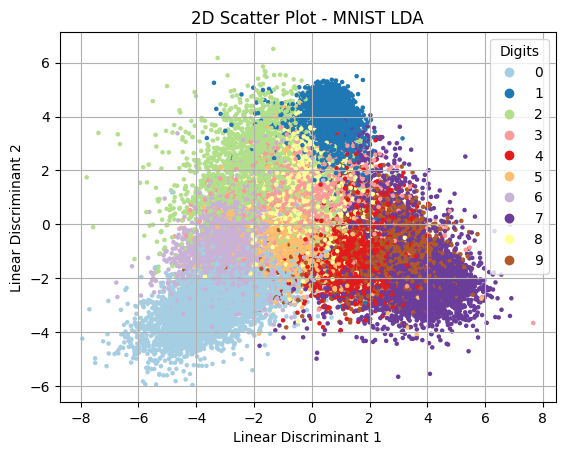

In [40]:
plt.figure()
scatter = plt.scatter(x_train_lda[:, 0], x_train_lda[:, 1], c=y_train, cmap='Paired', s=5)
plt.legend(handles=scatter.legend_elements()[0], labels=list(range(10)), title="Digits")
plt.title('2D Scatter Plot - MNIST LDA')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.grid(True)
plt.show()

Από το παραπάνω διάγραμμα προκύπτει ότι κάποιες κλάσεις είναι πολύ καλά διαχωρισμένες ενώ κάποιες άλλες όχι. Πιο συγκεκριμένα, το 0 και το 1 σχηματίζουν αρκετά πυκνές συστάδες στο κάτω αριστερά και στο πάνω δεξιά τμήμα αντίστοιχα του διαγράμματος. Ωστόσο, υπάρχουν πολλές περιοχές που επικαλύπτονται, γεγονός το οποίο σημαίνει ότι τα ψηφία δεν μπορούν να διακριθούν εύκολα ακόμα και με τους δύο βέλτιστους γραμμικούς συνδιασμούς. Η επικάλυψη αυτή οφείλεται στο ότι το MNIST δεν είναι γραμμικά διαχωρίσιμο και η LDA προσπαθεί να συμπιέσει τη διαχωριστική πληροφορία σε 2 διαστάσεις.
Συμπεραίνοντας, με τη μέθοδο LDA κάποιες κλάσεις μπορούν να διακριθούν ενώ κάποιες άλλες όχι. Συνεπώς, οι κλάσεις (ψηφία) που έχουν παρόμοια σχήματα δεν μπορούν να διακριθούν τέλεια με τη μείωση των διαστάσεων σε 2.

#5.5.1 Uniform Manifold Approximation and Projection (UMAP)

In [41]:
n_components = 2
u = umap.UMAP(n_components=n_components, random_state=42)
x_train_umap = u.fit_transform(x_train)
x_train_umap.shape

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(60000, 2)

#5.5.2 2D Scatter Plot

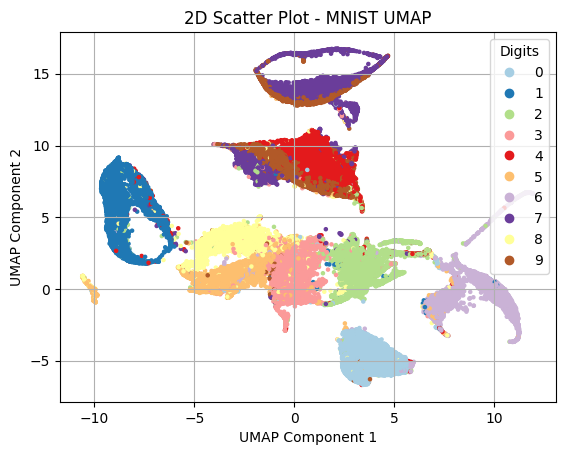

In [42]:
plt.figure()
scatter = plt.scatter(x_train_umap[:, 0], x_train_umap[:, 1], c=y_train, cmap='Paired', s=5)
plt.legend(handles=scatter.legend_elements()[0], labels=list(range(10)), title="Digits")
plt.title('2D Scatter Plot - MNIST UMAP')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.grid(True)
plt.show()

Συγκρίνοντας τα δύο διαγράμματα προκύπτει ότι η μέθοδος UMAP είναι πιο αποτελεσματική στην οπτικοποίηση του διαχωρισμού των δεδομένων MNIST σε δύο διαστάσεις. Πιο συγκεκριμένα, παρατηρώντας το 2ο διάγραμμα οι περισσότερες κλάσεις σχηματίζουν αρκετά διακριτές συστάδες (π.χ. 0, 1, 2, 6). Από την άλλη πλευρά, η LDA ως γραμμική μέθοδος βρίσκει έναν πιο απλό διαχωρισμό ο οποίος δεν είναι τόσο αποτελεσματικός. Συμπεραίνοντας, η UMAP, ως μη γραμμική μέθοδος, παρέχει έναν καθαρότερο διαχωρισμό σε δύο διαστάσεις μεταξύ των κλάσεων.